In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Muat dataset
file_path = 'dataset_prediksi_penyakit_pernapasan.csv'
df = pd.read_csv(file_path)

df.head()

,Umur,Batuk_Kering,Batuk_Berdahak,Demam,Pilek,Hidung_Tersumbat,Sesak_Napas,Nyeri_Tenggorokan,Sakit_Kepala,Mual_Muntah,Nyeri_Dada,Suara_Serak,Kelelahan,Berkeringat_Malam,Nafsu_Makan_Turun,Hilang_Penciuman,Nyeri_Saat_Menelan,Diagnosis
0,41,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,Sinusitis
1,52,1,0,1,1,1,0,0,0,1,0,0,1,1,1,0,0,Demam Biasa
2,15,1,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,Asma
3,27,1,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,Asma
4,70,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,Demam Biasa


In [3]:
# Menghapus kolom 'Umur' dari DataFrame
if 'Umur' in df.columns:
    df = df.drop(columns=['Umur'])

display(df.head())

,Batuk_Kering,Batuk_Berdahak,Demam,Pilek,Hidung_Tersumbat,Sesak_Napas,Nyeri_Tenggorokan,Sakit_Kepala,Mual_Muntah,Nyeri_Dada,Suara_Serak,Kelelahan,Berkeringat_Malam,Nafsu_Makan_Turun,Hilang_Penciuman,Nyeri_Saat_Menelan,Diagnosis
0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,Sinusitis
1,1,0,1,1,1,0,0,0,1,0,0,1,1,1,0,0,Demam Biasa
2,1,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,Asma
3,1,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,Asma
4,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,Demam Biasa


In [4]:
# Tampilkan kelas penyakit yang ada di kolom 'Diagnosis'
print("\nDistribusi Kelas Penyakit (Target):")
print(df['Diagnosis'].value_counts())


Distribusi Kelas Penyakit (Target):
Diagnosis
Bronkitis          328
Demam Biasa        302
Tidak ISPA         300
Pneumonia          284
Faringitis         217
Asma               185
Laringitis         157
Sinusitis          135
COVID-19 Ringan     92
Name: count, dtype: int64


In [5]:
# 1. Pisahkan Fitur (X) dan Target (y)
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# 2. Encoding Target (y)
# Mengubah nama penyakit (teks) menjadi angka (0, 1, 2, ...)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Menampilkan pemetaan (Untuk interpretasi)
print("\nPemetaan Label Penyakit:")
for i, class_name in enumerate(le.classes_):
    print(f"{i} -> {class_name}")

print(f"\nJumlah fitur (gejala) yang digunakan: {X.shape[1]}")


Pemetaan Label Penyakit:
0 -> Asma
1 -> Bronkitis
2 -> COVID-19 Ringan
3 -> Demam Biasa
4 -> Faringitis
5 -> Laringitis
6 -> Pneumonia
7 -> Sinusitis
8 -> Tidak ISPA

Jumlah fitur (gejala) yang digunakan: 16


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

Jumlah data training: 1600
Jumlah data testing: 400


In [7]:
# 1. Membuat (inisialisasi) model
# BernoulliNB (1/0)
model_nb = BernoulliNB()

# 2. Melatih model menggunakan data training
model_nb.fit(X_train, y_train)

print("Model Bernoulli Naive Bayes berhasil dilatih!")

Model Bernoulli Naive Bayes berhasil dilatih!


In [8]:
# Meminta model untuk memprediksi data testing
y_pred = model_nb.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

Akurasi Model: 91.25%


In [9]:
# Menampilkan laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:
                 precision    recall  f1-score   support

           Asma       0.97      0.79      0.87        42
      Bronkitis       0.89      0.97      0.93        59
COVID-19 Ringan       0.00      0.00      0.00        21
    Demam Biasa       0.91      1.00      0.95        60
     Faringitis       0.91      1.00      0.95        48
     Laringitis       0.85      0.97      0.90        29
      Pneumonia       0.96      1.00      0.98        54
      Sinusitis       0.95      0.95      0.95        20
     Tidak ISPA       0.90      0.99      0.94        67

       accuracy                           0.91       400
      macro avg       0.82      0.85      0.83       400
   weighted avg       0.87      0.91      0.89       400



In [10]:
print(X.columns.to_list())

['Batuk_Kering', 'Batuk_Berdahak', 'Demam', 'Pilek', 'Hidung_Tersumbat', 'Sesak_Napas', 'Nyeri_Tenggorokan', 'Sakit_Kepala', 'Mual_Muntah', 'Nyeri_Dada', 'Suara_Serak', 'Kelelahan', 'Berkeringat_Malam', 'Nafsu_Makan_Turun', 'Hilang_Penciuman', 'Nyeri_Saat_Menelan']


In [11]:
# Daftar urutan 16 gejala
# ['Batuk_Kering', 'Batuk_Berdahak', 'Demam', 'Pilek', 
#  'Hidung_Tersumbat', 'Sesak_Napas', 'Nyeri_Tenggorokan', 'Sakit_Kepala', 
#  'Mual_Muntah', 'Nyeri_Dada', 'Suara_Serak', 'Kelelahan', 
#  'Berkeringat_Malam', 'Nafsu_Makan_Turun', 'Hilang_Penciuman', 
#  'Nyeri_Saat_Menelan']

# --- KASUS 1: (Batuk kering, Pilek, Hidung Tersumbat, Kelelahan, Hilang Penciuman)
kasus_1 = [
    1, # Batuk_Kering
    0, # Batuk_Berdahak
    0, # Demam
    1, # Pilek
    1, # Hidung_Tersumbat
    0, # Sesak_Napas
    0, # Nyeri_Tenggorokan
    0, # Sakit_Kepala
    0, # Mual_Muntah
    0, # Nyeri_Dada
    0, # Suara_Serak
    1, # Kelelahan
    0, # Berkeringat_Malam
    0, # Nafsu_Makan_Turun
    1, # Hilang_Penciuman
    0  # Nyeri_Saat_Menelan
]

# --- KASUS 2: (Batuk Berdahak, Demam, Sesak Napas, Nyeri Tenggorokan, Suara Serak)
kasus_2 = [
    0, # Batuk_Kering
    1, # Batuk_Berdahak
    1, # Demam
    0, # Pilek
    0, # Hidung_Tersumbat
    1, # Sesak_Napas
    1, # Nyeri_Tenggorokan
    0, # Sakit_Kepala
    0, # Mual_Muntah
    0, # Nyeri_Dada
    1, # Suara_Serak
    0, # Kelelahan
    0, # Berkeringat_Malam
    0, # Nafsu_Makan_Turun
    0, # Hilang_Penciuman
    0  # Nyeri_Saat_Menelan
]

# --- KASUS 3: (Batuk_Kering, Batuk_Berdahak, Demam, Pilek, Hidung_Tersumbat, Nyeri_Tenggorokan, Sakit_Kepala, Suara_Serak, Kelelahan, Nyeri_Saat_Menelan)
kasus_3 = [
    1, # Batuk_Kering
    1, # Batuk_Berdahak
    1, # Demam
    1, # Pilek
    1, # Hidung_Tersumbat
    0, # Sesak_Napas
    1, # Nyeri_Tenggorokan
    1, # Sakit_Kepala
    0, # Mual_Muntah
    0, # Nyeri_Dada
    1, # Suara_Serak
    1, # Kelelahan
    0, # Berkeringat_Malam
    0, # Nafsu_Makan_Turun
    0, # Hilang_Penciuman
    1  # Nyeri_Saat_Menelan
]

# --- KASUS 4: (Kita memiliki SEMUA 16 gejala)
kasus_4 = [
    1, # Batuk_Kering
    1, # Batuk_Berdahak
    1, # Demam
    1, # Pilek
    1, # Hidung_Tersumbat
    1, # Sesak_Napas
    1, # Nyeri_Tenggorokan
    1, # Sakit_Kepala
    1, # Mual_Muntah
    1, # Nyeri_Dada
    1, # Suara_Serak
    1, # Kelelahan
    1, # Berkeringat_Malam
    1, # Nafsu_Makan_Turun
    1, # Hilang_Penciuman
    1  # Nyeri_Saat_Menelan
]

# --- PROSES PREDIKSI ---

# 1. Gabungkan data pasien baru
data_kasus_baru = [kasus_1, kasus_2, kasus_3, kasus_4]

# 2. Lakukan prediksi
hasil_prediksi_encoded = model_nb.predict(data_kasus_baru)

# 3. Ubah hasil prediksi (angka) kembali menjadi Teks (Nama Penyakit)
hasil_prediksi_teks = le.inverse_transform(hasil_prediksi_encoded)

# 4. Tampilkan hasil
print("\n----- HASIL PREDIKSI PASIEN BARU -----")
for i, hasil in enumerate(hasil_prediksi_teks):
    print(f"Kasus {i+1} diprediksi menderita: {hasil}")



----- HASIL PREDIKSI PASIEN BARU -----
Kasus 1 diprediksi menderita: Sinusitis
Kasus 2 diprediksi menderita: Faringitis
Kasus 3 diprediksi menderita: Laringitis
Kasus 4 diprediksi menderita: Pneumonia


## PERHITUNGAN MANUAL (TP, TN, FP, FN, dan Specificity)

In [12]:
# 1. Dapatkan Confusion Matrix (data angkanya)
cm = confusion_matrix(y_test, y_pred)

print("\n--- Hasil Perhitungan Manual (TP, TN, FP, FN) ---")

# 2. Iterasi/Looping untuk setiap penyakit
for i, penyakit in enumerate(le.classes_):
    print(f"\n===== Metrik untuk: {penyakit} =====")
    
    # Ambil nilai dari Confusion Matrix untuk kelas (penyakit) ke-i
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    
    print(f"  True Positive  (TP): {TP}")
    print(f"  True Negative  (TN): {TN}")
    print(f"  False Positive (FP): {FP}")
    print(f"  False Negative (FN): {FN}")
    
    # 3. Hitung Metrik Performa (sesuai rumus Anda)
    Precission = (TP) / (TP + FP + 1e-6)
    Recall = (TP) / (TP + FN + 1e-6)
    Specificity = (TN) / (TN + FP + 1e-6)
    
    print(f"  Precission : {Precission * 100:.2f}%")
    print(f"  Recall     : {Recall * 100:.2f}%")
    print(f"  Specificity: {Specificity * 100:.2f}%")

print("\n")


--- Hasil Perhitungan Manual (TP, TN, FP, FN) ---

===== Metrik untuk: Asma =====
  True Positive  (TP): 33
  True Negative  (TN): 357
  False Positive (FP): 1
  False Negative (FN): 9
  Precission : 97.06%
  Recall     : 78.57%
  Specificity: 99.72%

===== Metrik untuk: Bronkitis =====
  True Positive  (TP): 57
  True Negative  (TN): 334
  False Positive (FP): 7
  False Negative (FN): 2
  Precission : 89.06%
  Recall     : 96.61%
  Specificity: 97.95%

===== Metrik untuk: COVID-19 Ringan =====
  True Positive  (TP): 0
  True Negative  (TN): 378
  False Positive (FP): 1
  False Negative (FN): 21
  Precission : 0.00%
  Recall     : 0.00%
  Specificity: 99.74%

===== Metrik untuk: Demam Biasa =====
  True Positive  (TP): 60
  True Negative  (TN): 334
  False Positive (FP): 6
  False Negative (FN): 0
  Precission : 90.91%
  Recall     : 100.00%
  Specificity: 98.24%

===== Metrik untuk: Faringitis =====
  True Positive  (TP): 48
  True Negative  (TN): 347
  False Positive (FP): 5
  False

In [13]:
unique_labels = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)

In [14]:
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8]


In [15]:
class_names = [
    "Asma", "Bronkitis", "COVID-19 Ringan", "Demam Biasa",
    "Faringitis", "Laringitis", "Pneumonia", "Sinusitis", "Tidak ISPA"
]

# hitung confusion matrix
labels = np.arange(len(class_names))   # [0,1,...,8]
cm = confusion_matrix(y_test, y_pred, labels=labels)

## PLOT CONFUSION MATRIX (HEATMAP)

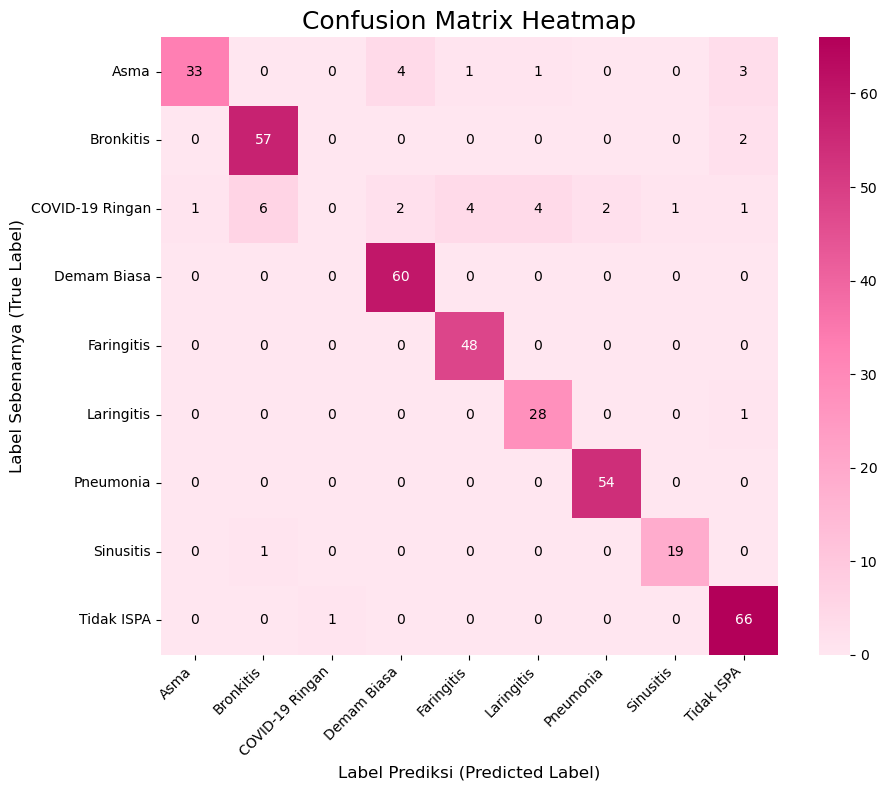

In [16]:
colors = ["#ffe6f0", "#ff80b3", "#b30059"]
custom_cmap = LinearSegmentedColormap.from_list("maroon_pink", colors)

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(
    cm,
    annot=False,
    fmt="d",
    cmap=custom_cmap,
    linecolor="white",     
    square=True, 
    xticklabels=class_names,
    yticklabels=class_names,
    cbar=True,
    ax=ax
)

# Tambahkan angka ke setiap sel dengan warna dinamis agar terbaca
max_val = cm.max()
threshold = max_val / 2

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        val = cm[i, j]
        color = "white" if val > threshold else "black"
        ax.text(
            j + 0.5,
            i + 0.5,
            str(val),
            ha="center",
            va="center",
            color=color,
            fontsize=10,
            
        )

# Label & formatting
plt.title('Confusion Matrix Heatmap', fontsize=18)
plt.ylabel('Label Sebenarnya (True Label)', fontsize=12)
plt.xlabel('Label Prediksi (Predicted Label)', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()